<a href="https://colab.research.google.com/github/mnshcodie/IIScEx_2021/blob/main/M3_AST_19_LSTM_%26_Caltech101_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 19: Prediction of IBM stock price using LSTM & Classification of Caltech 101 images using CNN

## Learning Objectives

   
  At the end of the experiment, you will be able to understand:
  * How to make predictions on time series data (IBM Stock Price) using LSTM    
  * How to implement CNN on Caltech 101 Dataset
  * CNN for Image Classification
  * How to use CNN for Computer Vision tasks


### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M3_AST_19_LSTM_&_Caltech101_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/IBM_2006-01-01_to_2018-01-01.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



### Dataset Description for IBM Stock Prices

The dataset contains 12 years of stock data (in the range 2006-01-01 to 2017-12-29). 

Note: On 30th and 31st December 2017, the days were saturday and sunday when market is closed. 

Moreover,the dataset contains the following columns:

1. **Date** - in format: yy-mm-dd

2. **Open** - price of the stock at market open (this is NYSE data so all in USD)

3. **High** - Highest price reached in the day

4. **Low** - Lowest price reached in the day

5. **Volume** - Number of shares traded

6. **Name** - the stock's ticker name

### Problem Statement
Given the historical data of IBM stock prices(2006-2018), we need to predict the price of stock for the next day. This task can help us with better readiness with a picture of what can come next in the stock market.

**Note** : To train our model, we will take past 60 days data as **Input** and predict the price of stock for the next day.

### Introduction

Sequence prediction problems have been around for a long time. They are considered as one of the hardest problems to solve in the data science industry. These include a wide range of problems; from predicting sales to finding patterns in stock markets’ data, from understanding movie plots to recognizing your way of speech, from language translations to predicting your next word on your iPhone’s keyboard.

With the recent breakthroughs that have been happening in data science, it is found that for almost all of these sequence prediction problems, Long short Term Memory networks, a.k.a LSTMs have been observed as the most effective solution.

LSTMs have an edge over conventional feed-forward neural networks and RNN in many ways. This is because of their property of selectively remembering patterns for long durations of time.

**Long Short-Term Memory** units (LSTM) deal with the vanishing gradient problem encountered by traditional RNNs and able to remember a piece of information and keep it saved for many timesteps. This is a behavior required in complex problem domains like machine translation, speech recognition, and more.


#### Importing required packages and library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD 
import math
from keras import optimizers
from sklearn.metrics import mean_squared_error

### Loading the dataset

In [ ]:
dataset = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

Let us look at few of the values from the dataset.

In [ ]:
# Getting the first five values
dataset.head()

In [ ]:
# Getting the last five values
dataset.tail()

Here, we can see that the IBM stock data is available till 29th December 2017(2 days short of 1st Jan 2018).

Further, let us check few information related to the attributes present in the data.

In [ ]:
dataset.info()

Here, we can observe that there are 3020 entries but the column 'Open' and 'Low' has 3019 entries. This means that there are missing values in the dataset. 

In [ ]:
# Sum of missing values in the dataset for all the columns
print(dataset.isnull().sum())

Now, let us impute the missing values with the mean values of the respective columns.

In [ ]:
new_dataset = dataset
new_dataset['Open']=new_dataset['Open'].fillna(new_dataset['Open'].mean())
new_dataset['Low']=new_dataset['Low'].fillna(new_dataset['Low'].mean())
new_dataset.info()

Dividing the data into training set and test set. The training data consists of stock prices from 2006 to 2016 and the test set has the stock prices after 2016. 

In [ ]:
training_set = new_dataset[:'2016'].iloc[:,1:2].values
test_set = new_dataset['2017':].iloc[:,1:2].values

In [ ]:
# Shape of training set
training_set.shape

In [ ]:
# Shape of test set
test_set.shape

Creating helper function for plotting real IBM stock prices and predicted IBM stock prices. Also, creating a function for calculatin rmse value for test set and predictions.

In [ ]:
# Real IBM stock price vs predicted IBM stock price
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

# Function for calculating RMSE
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))


Further, let us choose 'High' attribute for prices and see what it looks like.

In [ ]:
new_dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
new_dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

### Data Normalization



We will normlize the data using MinMaxScaler so that the data is in the range of 0 and 1

In [ ]:
# Scaling the training set using MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Data Preparation

Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output. So, for each element of training set, we have 60 previous training set elements. 

In [ ]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

Checking the shape of X_train and y_train in order to understand more about the structure of training features and labels.

In [ ]:
X_train.shape

In [ ]:
y_train.shape

#### Reshaping the data

One of the essential point to remember is that LSTM requires inputs to have shape: `[batch, timesteps, feature]`. Therefore, we will reshape the training set in certain dimensions so that it can be a valid input to the fit() function of the Sequential() model of Keras.

To know more about implementing LSTM layer using Keras go through the [Keras' documentation](https://keras.io/api/layers/recurrent_layers/lstm/).

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

Checking the shape after reshaping the X_train data.

In [ ]:
X_train.shape

### Building LSTM Model

Before moving ahead with building model let us understand about LSTM.

#### **Long Short-Term Memory units (LSTM Cell)**

![Img](https://cdn.iisc.talentsprint.com/CDS/Images/LSTM_Cell.PNG)

$\text{Figure:  LSTM-Cell }$ 

##### **Understanding Gates and States**


**Forget gate** (Controlled by $f_{(t)}$) controls which parts of the long-term state should be erased.

**Input gate** (controlled by :  $i_{(t)}$) controls which parts of a  $g_{(t)}$ should be added to the long term cell state  $c_{(t)}$.

**Output gate** (controlled by $o_{(t)}$) controls which parts of the long term cell state should be read and output at this time step, both to prediction $y_{(t)}$  and $h_{(t)}$.

**Long term Cell state**  $c_{(t)}$ is the "memory" that gets passed onto future time steps.

 **Short term Cell state** $h_{(t)}$

* The Short term state gets passed to the LSTM cell's next time step.
* It is used to determine the three gates (Controlled by $f_{(t)}$, $i_{(t)}$, $o_{(t)}$) of the next time step.
* It is also used for the prediction $y_{(t)}$.

**Embedding Layer:**  it creates word vectors of each word in the word_index and group words that are related or have similar meaning by analyzing other words around them.

**LSTM Layer:** Deep network takes the sequence of embedding vectors as input and converts them to a compressed representation. The compressed representation effectively captures all the information in the sequence of words in the text.

**Dense Layer:** The fully connected layer takes the deep representation from the LSTM and transforms it into the final output classes or class scores (using sigmoid activation function). 

Now, let us build the LSTM model.




In [ ]:
# Creating Sequential model
model = Sequential()

# First Layer
model.add(LSTM(units=50, input_shape=(X_train.shape[1],1), return_sequences=True))
model.add(Dropout(0.2))

# Second Layer
model.add(LSTM(units=40))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=30))

model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model using X_train and y_train model
model.fit(X_train,y_train,epochs=50,batch_size=32)

Now, we will get the test set ready in a similar way as the training set.

In [ ]:
dataset_total = pd.concat((new_dataset["High"][:'2016'],new_dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

Checking the shape of the input.

In [ ]:
inputs.shape

Preparing X_test and predicting the stock prices.

In [ ]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualizing the results for LSTM model built.

In [ ]:
plot_predictions(test_set,predicted_stock_price)

#### Evaluating the model

Let us evaluate the LSTM model using RMSE value.

In [ ]:
return_rmse(test_set,predicted_stock_price)

Let us look at the predictions for the next day which is 1st January 2018.

In [ ]:
print(f'Prediction of stock prices for the next day is {predicted_stock_price[-1,0]}')

## Classification of Caltech 101 Images

### Dataset Description

The Caltech 101 dataset consists pictures of objects belonging to 101 categories. There are about 40 to 800 images per category. Also, most of the  categories have about 50 images.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os,shutil,glob,PIL
import pathlib
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
from torchvision import transforms,datasets,utils
import matplotlib.pyplot as plt
import torchvision.models as models
import torch.optim as optim
from tqdm import tqdm
from google.colab import drive
%matplotlib inline
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
from keras import regularizers
from keras.utils import np_utils
import tensorflow as tf

torch.cuda.is_available()  #checking the availability of GPU

### Mouting the Drive for downloading the data

In [ ]:
!gdown --id 14QBPlpC7j-NhL3IVsPrViO1ZrYbsEcJb

### Unzipping the files

In [ ]:
%%capture
!unzip '/content/Caltech 101 Train and Test.zip'

Declaring batch size for data generator(keras) and data loader(PyTorch).

In [ ]:
batch_size = 32

Let us calculate the number of images by folder. 

In [ ]:
train_dir = "/content/Caltech_101_train"

In [ ]:
image_count = {}
for root, dirs, files in os.walk(train_dir):
    for f in dirs:
      initial_count = 0
      for path in pathlib.Path(train_dir,f).iterdir():
        if path.is_file():
          # print(path)
          initial_count += 1
        image_count[f] = initial_count
        
        
print(image_count)
total_images=0
for v in image_count.values():
  total_images+=v
print(total_images)

Now, let us remove the empty directory.

In [ ]:
shutil.rmtree("/content/Caltech_101_train/car_side")

### Resizing the Images 
Here, we will resize the images to (224,224) and normalize them with mean and standard deviation.

In [ ]:
transformer = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((0.5474, 0.5311, 0.5050), (0.3133, 0.3073, 0.3204))])
# Choose the training dataset
train_data_folder = "/content/Caltech_101_train" # Train directory for loading images
train_data = datasets.ImageFolder(root=train_data_folder, transform=transformer)

Let us the load the images from the folder using DataLoader.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=False)

Further, let us calculate the mean of images for normalizing with PyTorch transformation.

In [ ]:
mean = 0.0
for img, _ in train_data:
    mean += img.mean([1,2])
mean = mean/len(train_data)
print(mean)

Now, calculating the standard deviation of image for normalizing with PyTorch transformation.

In [ ]:
sumel = 0.0
countel = 0
for img, _ in train_data:
    img = (img - mean.unsqueeze(1).unsqueeze(1))**2
    sumel += img.sum([1, 2])
    countel += torch.numel(img[0])
std = torch.sqrt(sumel/countel)
print(std)

Here, we are checking the number of classes in train directory.

In [ ]:
len(train_data.classes)

Now, let us check that whether we are using GPU or CPU. 


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

### Transfer Learning using ResNet18
**Transfer learning** consists of taking features learned on one problem, and leveraging them on a new, similar problem.

Also, here we are using a **pre-trained model** which is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 101 probabilities in our case.


#### Explanation for ResNet - 18

Before moving ahead with Transfer Learning using ResNet, let us first try to understand about ResNet18 and it's architecture.

ResNet-18 is a convolutional neural network that is 18 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

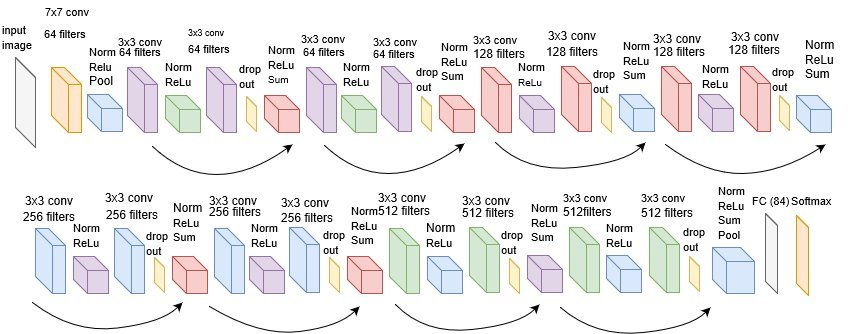

Since, now we are aware of ResNet18 and it's architecture, let us build the model.

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs,101)
model_ft = model_ft.to(device)
print(model_ft)

We can see that ResNet18 model is downloaded and we tuned its number of ouput features to 101.

#### Implementing Adam Optimizer and Loss function 
Here, we will implement Adam optmizer using `torch.optim` module.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ft.parameters(), lr=0.001)

Let us create helper function to train function the images.

In [ ]:
train_accu = []     # Empty list for saving train accuracy
train_losses = []   # Empty list for saving train losses
def train(epoch):
  print('\nEpoch : %d'%epoch)
   
  model_ft.train()    # Initiate the model in training mode
 
  running_loss=0
  correct=0
  total=0
 
  for data in tqdm(train_loader):
     
    inputs,labels=data[0].to(device),data[1].to(device)   # Loading the input tensors into CUDA GPU 
     
    optimizer.zero_grad()
    outputs=model_ft(inputs)               
    loss = criterion(outputs,labels)  # Calculating the loss
    loss.backward()                   # Back Propagation for calculaing gradients and adjusting weights
    optimizer.step()
 
    running_loss += loss.item()
     
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()
       
       
  train_loss=running_loss/len(train_loader)     # Calculating the mean of training loss
  accu=100.*correct/total                       # Calculating the accuracy
   
  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

Let us train the model for 15 epochs.

In [ ]:
epochs=15
for epoch in range(1,epochs+1): 
  train(epoch)

We can see that after training for 15 epochs we got the accuracy 98% which is considered as a good accuracy score.

Now, let us save the trained model for inferencing in future.

In [ ]:
PATH='/content/Caltech101-ResNet18_normalize.pth'
torch.save(model_ft.state_dict(),PATH)  #saving the model to specified path

### Plotting the train accuracy and train loss vs epochs

#### Plot for train accuracy

In [ ]:
plt.plot(train_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train'])
plt.show()

#### Plot for train loss


In [ ]:
plt.plot(train_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.title('Train Loss')
plt.show()

### Prediction of the images
Our trained model is applied on test directory and the output tensor containing labels is saved in predictions.

Now, let us initiate the Pytorch model in eval() mode.

In [ ]:
model_ft.eval()

#### Helper function for predicting images

In [ ]:
def predict_image(image):

    transformation = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])

    image_tensor = transformation(image)
    image_tensor = image_tensor.unsqueeze_(0)

    input = image_tensor
    
    output = model_ft(input.to(device))
    pred = torch.max(output,1)

    return pred

#### Individual Image prediction
Here, we are predicting the output of the `predict_image` function on individual image using path of the image.

In [ ]:
i = "/content/Caltech_101_test/1630.jpg"

In [ ]:
image = Image.open(i)
predict_image(image)

The prediction in above cell gives the label of prediction. We can refer it's actual text or label from train directory classes.

In [ ]:
train_data.classes[34]

#### Creating DataFrame of image paths 
Let us create the DataFrame containing the image paths and sort them in order by image name.

In [ ]:
df = pd.DataFrame()
df['img_path'] = glob.glob("/content/Caltech_101_test/*")
df['order'] = [int(i.split("/")[3][:-4]) for i in df['img_path']]
df.sort_values('order',inplace=True)
df.reset_index(inplace=True,drop=True)

Further, let us append the predicted labels to a list so that we can upload the csv file to kaggle competition.

In [ ]:
pred = []
for i in df.img_path:
  try:
    image = Image.open(i)
    pred.append(predict_image(image).indices)  #Appending the predicted indices tensor to prediction array
  except Exception as e:
    print(e)

Extracting labels(string from) using pred array(contains predicted labels in integer form) 

In [ ]:
predictions = []
for i in pred:
  predictions.append(train_data.classes[i])

#### Renaming the paths 
We rename the path so that it will be suitable for uploading to Kaggle submission in same format as in competition.

In [ ]:
df['img_path'] = "Caltech_101_test"+"/"+df.img_path.apply(lambda x:x.split("/")[3].lower())

#### Appending the predicted labels
Predicted labels are added as column to dataframe containing the paths.

In [ ]:
df['label'] = predictions

Till now, we have trained a pretrained model on Caltech 101 dataset using PyTorch. Further, let us build Multi-layer CNN using Keras.

## Multi-layer CNN using Keras

In [ ]:
TRAINING_DIR = "/content/Caltech_101_train"

### Image Data generator
Images are resized and loaded from folders in batches of 32 and resized to (224,224,3). 

Further, we have normalized the pixels from (0-255) to (0-1).

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=32,target_size=(224,224))

### Parameters for keras model
* Learning rate
* Epochs
* Filters
* Batch size
* Optimizer

In [ ]:
# Initializing the parameters
lr = .001
epochs = 20
decay = lr/epochs
layer = 3
filterz = 32
batch_size = 32
adam = tf.keras.optimizers.Adam(learning_rate=lr,decay=decay)

### Building CNN using Keras

**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**  

Passing an image with input shape of 3-D and to calculate the output: 

 $O = \frac{n - f + 2p}{s} + 1$

**MaxPool** 

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of: 

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is: 

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

In [ ]:
img_size = 224

model = Sequential()
model.add(Conv2D(filters = (filterz), kernel_size= (3,3), input_shape = (img_size,img_size,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add( MaxPooling2D(pool_size = (2,2)))
print('filter: '+ str(filterz))

for i in range(layer):             # Creating three layers of CNN with variable filer sizes
    filterz1 = filterz * (2**(i+1))
    model.add(Conv2D(filters = filterz1, kernel_size= (3,3), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add( MaxPooling2D(pool_size = (2,2)))
    print('filter: '+ str(filterz * (2**(i+1))))

print('\n')
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu')) 

model.add(Dense(train_generator.num_classes,activation='softmax'))
model.compile(adam, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Number of Classes
Let us see number of classes in our train directory

In [ ]:
train_generator.num_classes

### Training the Model
Compile model is trained for 20 epochs

In [ ]:
history = model.fit(train_generator,  epochs=20, verbose=1)

### Plotting the Train loss and Train accuracy

#### Plot of Training Accuracy

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### Plot of Training Loss

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.xlabel('# epochs')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

### Predicting the Test Images from directory
Let us predict the images in test directory.

#### Converting image to numpy arrays

In [ ]:
features = []
for i in df.img_path:
  im = np.array(PIL.Image.open(i).resize((224,224)))
  features.append(im)

In [ ]:
features = np.array(features)

Let us predict predict the labels of the images.

In [ ]:
pred = model.predict(features)

In [ ]:
pred.shape

#### Getting max of predictions

In [ ]:
act_pred = np.argmax(pred,axis=1)
set(act_pred)

#### Converting integer labels
Integer labels are converted to actual text which is the name of actual category.

In [ ]:
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in act_pred]

### Please answer the questions below to complete the experiment:




In [ ]:
#@title Q.1. What is the purpose of using forget gate in LSTM? { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","To generate the inputs for input and output gates.", "It helps in updating the information in such a way that there is no requirement of input and output gates.", "It is a memory unit that retains information accross timesteps.", "None of the above"]


#### **Statements**
1.  Deep networks do not perform hierarchical data abstractions which enable the non-linear separation of complex data samples.

2.  Deep networks perform hierarchical data abstractions which cannot perform the non-linear separation of complex data samples.

3.  Deep networks perform hierarchical data abstractions which enable the non-linear separation of complex data samples.

In [ ]:
#@title Q.2. Which of the above statement/statements is true? { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","Statement 2", "Statement 3", "Statement 1", "All of the above"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")